In [5]:
import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
#c = np.sum(a*b)
c = np.dot(a,b)
c

32

In [12]:
a = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])
b = np.array([4,5,6])
c = np.dot(b,a)
print(c)
d = np.dot(a,b)
print(d)

[66 81 96]
[ 32  77 122]


In [22]:
a = np.array([[1,2,3]])
print(len(a))
print(a.shape)
b = np.array([[2],[2],[2]])
print(len(b))
print(b.shape)
c = np.dot(a,b)
print(c.ndim)
print(c.shape)
print(c)
c = np.dot(b,a)
print(c)

1
(1, 3)
3
(3, 1)
2
(1, 1)
[[12]]
[[2 4 6]
 [2 4 6]
 [2 4 6]]


In [26]:
a = np.array([[1,2,3],
              [4,5,6]])
print(a.shape)
b = np.array([[2],[2],[2]])
print(b.shape)
c = np.dot(a,b)
print(c)
c = np.dot(b,a)

(2, 3)
(3, 1)
[[12]
 [30]]


ValueError: shapes (3,1) and (2,3) not aligned: 1 (dim 1) != 2 (dim 0)

In [29]:
a = np.array([[1,2,3],
              [4,5,6]])
print(a.shape)
b = np.array([[1,2],
              [1,2],
              [1,2]])
print(b.shape)
c = np.dot(a,b)
print(c.shape)

(2, 3)
(3, 2)
(2, 2)


In [31]:
a = np.array([1,2,3,4,5])
print(a)
b = a
b[0] = 10
print(a)

[1 2 3 4 5]
[10  2  3  4  5]


In [33]:
a = np.array([1,2,3,4,5])
b = a.copy()
print(a)
print(b)
b[0]=10
print(a)
print(b)

[1 2 3 4 5]
[1 2 3 4 5]
[1 2 3 4 5]
[10  2  3  4  5]


In [39]:
a = np.array([1,2,3])
print(a.shape)
print(a.T)
print(a.T.shape)
b = np.reshape(a,(-1,1))
print(b.shape)

(3,)
[1 2 3]
(3,)
(3, 1)


In [42]:
a = np.array([[1,2,3],
              [1,2,3]])
print(a)
print(a.shape)
print(a.T)
print(a.T.shape)

[[1 2 3]
 [1 2 3]]
(2, 3)
[[1 1]
 [2 2]
 [3 3]]
(3, 2)


In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [89]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,
                            stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                    stratify=y_train_all, test_size=0.2, random_state=42)

In [90]:
print(x_train.shape)
print(y_train.shape)

(364, 30)
(364,)


In [91]:
a = x_train[:,1]
a = np.reshape(a,(-1,1))
print(a.shape)

(364, 1)


In [92]:
a = np.reshape(a,(a.shape[0],))
err = a-y_train
print(a.shape)
print(y_train.shape)
err = np.reshape(err,(err.shape[0],1))
print(err.shape)

(364,)
(364,)
(364, 1)


In [93]:
class SingleLayer:
    def __init__(self, learning_rate = 0.01,l1=0,l2=0):  ##
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []        
        self.lr = learning_rate    
        self.val_losses = []
        self.l1=l1
        self.l2=l2
        
    def forpass(self,x):
        z = np.dot(x, self.w) + self.b
        return z
    def activation(self,z):
        z = np.clip(z,-100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T,err) /m
        b_grad = np.sum(err)/m
        return w_grad, b_grad
    
    def fit(self,x,y,epochs=100,x_val=None, y_val=None):
        y = y.reshape(-1,1)
        y_val = y_val.reshape(-1,1)
        m = len(x)
        self.w = np.ones((x.shape[1],1))
        self.b = 0
        self.w_history.append(self.w.copy())
        np.random.seed(42)
        for i in range(epochs):
            z = self.forpass(x)
            a = self.activation(z)
            err = a - y
            w_grad,b_grad = self.backprop(x,err)    
            w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
            self.w -= self.lr * w_grad           ##        
            self.b -= self.lr * b_grad
            self.w_history.append(self.w.copy())  
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss())/m)  ##
            self.update_val_loss(x_val,y_val)
    def reg_loss(self):  
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)  
    
    def update_val_loss(self,x_val,y_val):    
        z = self.forpass(x_val)
        a = self.activation(z)
        a = np.clip(a,1e-10, 1-1e-10)
        val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss+ self.reg_loss())/len(y_val))
    def predict(self,x):
        z = self.forpass(x)
        return z > 0
    
    def score(self,x,y):
        return np.mean(self.predict(x) == y.reshape(-1,1))

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [97]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train,
                x_val=x_val_scaled, y_val = y_val, epochs=10000)
single_layer.score(x_val_scaled,y_val)

0.978021978021978

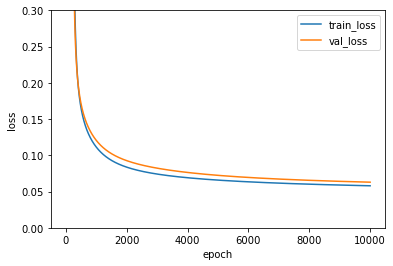

In [98]:
plt.ylim(0,0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

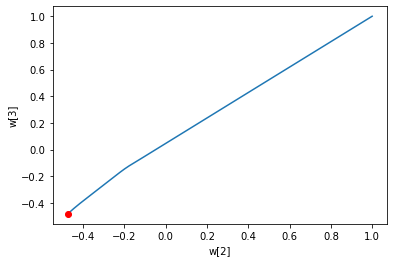

In [99]:
w2 = []
w3 = []
for w in single_layer.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [100]:
class DualLayer(SingleLayer):
    
    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units         
        self.w1 = None             
        self.b1 = None             
        self.w2 = None             
        self.b2 = None             
        self.a1 = None             
        self.losses = []           
        self.val_losses = []       
        self.lr = learning_rate    
        self.l1 = l1               
        self.l2 = l2               

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        
        self.a1 = self.activation(z1)            
        z2 = np.dot(self.a1, self.w2) + self.b2  
        return z2

    def backprop(self, x, err):
        m = len(x)       
        
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  
        self.b1 = np.zeros(self.units)               
        self.w2 = np.ones((self.units, 1))           
        self.b2 = 0
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          
        y_val = y_val.reshape(-1, 1)
        m = len(x)                    
        self.init_weights(x.shape[1]) 
        
        for i in range(epochs):
            a = self.training(x, y, m)
            
            a = np.clip(a, 1e-10, 1-1e-10)
            
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            
            self.update_val_loss(x_val, y_val)
            
    def training(self, x, y, m):
        z = self.forpass(x)       
        a = self.activation(z)    
        err = -(y - a)            
        
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
    
    def reg_loss(self):
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

In [101]:
dual_layer = DualLayer(l2=0.01)
dual_layer.fit(x_train_scaled, y_train, 
               x_val=x_val_scaled, y_val=y_val, epochs=20000)
dual_layer.score(x_val_scaled, y_val)

0.978021978021978

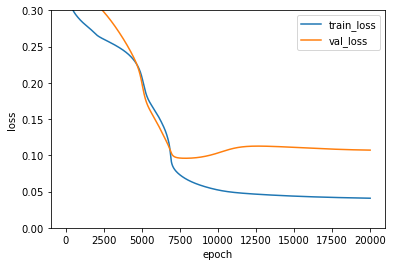

In [102]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [103]:
class RandomInitNetwork(DualLayer):
    
    def init_weights(self, n_features):
        np.random.seed(42)
        self.w1 = np.random.normal(0, 1, 
                                   (n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)                        # 은닉층의 크기
        self.w2 = np.random.normal(0, 1, 
                                   (self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0

In [105]:
random_init_net = RandomInitNetwork(l2=0.01)
random_init_net.fit(x_train_scaled, y_train,
                    x_val=x_val_scaled, y_val=y_val, epochs=500)

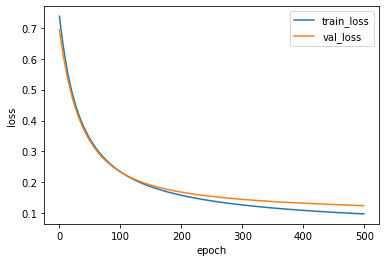

In [106]:
plt.plot(random_init_net.losses)
plt.plot(random_init_net.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()